In [ ]:
import pandas as pd #importing pandas library
import numpy as np #inporting numpy library
import matplotlib.pyplot as plt #importing matplotlib library

In [ ]:
test_data = pd.read_csv('test.txt', sep=",", header=None) #Reading File Named 'train.txt' with Separator ' '
test_data.columns = ["x1", "y1"] #Giving Column Names

In [ ]:
test_data

,x1,y1
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [ ]:
#Declaring Parameters
prior1=0.5
prior2=0.5
mu1=np.array([0,0])
mu2=np.array([2,2])
sigma1=np.array([[0.25,0.3],[0.3,1]])
sigma2=np.array([[0.5,0],[0,0.5]])

In [ ]:
print(mu1)
print(mu2)
print(sigma1)
print(sigma2)

[0 0]
[2 2]
[[0.25 0.3 ]
 [0.3  1.  ]]
[[0.5 0. ]
 [0.  0.5]]


In [ ]:
det_sigma1= np.linalg.det(sigma1)
det_sigma2= np.linalg.det(sigma2)

In [ ]:
print(det_sigma1)
print(det_sigma2)

0.15999999999999998
0.25


In [ ]:
from numpy.linalg import inv
inv_sigma1 = inv(sigma1)
inv_sigma2 = inv(sigma2)

In [ ]:
print(inv_sigma1)
print(inv_sigma2)

[[ 6.25   -1.875 ]
 [-1.875   1.5625]]
[[2. 0.]
 [0. 2.]]


In [ ]:
b=test_data.shape #Finding The Shape of Train Dataset
print(b[0]) #Printing the  Row Numbers
RowNumber=b[0] #Assigning Row Numbers in RowNumber
PI = 3.14159

normal_dist_1=[]
normal_dist_2=[]
#Defining 4 Lists for Train Class 1 and Class 2
for i in range(0,RowNumber):
    test_datapoint=np.array([test_data.at[i,'x1'],test_data.at[i,'y1']])
    normal_dist_1.append((1/(2*PI*np.sqrt(det_sigma1)))*(np.exp(-0.5*(np.dot((test_datapoint - mu1).transpose(), np.dot(inv_sigma1,(test_datapoint - mu1)))))))
    normal_dist_2.append((1/(2*PI*np.sqrt(det_sigma2)))*(np.exp(-0.5*(np.dot((test_datapoint - mu2).transpose(), np.dot(inv_sigma2,(test_datapoint - mu2)))))))

posterior_1 = [i * prior1 for i in normal_dist_1]
posterior_2 = [i * prior2 for i in normal_dist_2]

print(posterior_1)
print(posterior_2)


6
[0.026095753724665355, 0.0006137133040176839, 2.4419422444312502e-15, 4.763873217348531e-13, 0.008740982596274385, 8.523215915379237e-15]
[0.021539297495314906, 7.225629340952329e-06, 3.597429019988373e-07, 1.394874604808972e-08, 0.002915026927246105, 2.2103367824833958e-12]


In [ ]:
#Testing Class
test_class=[]
for i in range(6):
  if (posterior_1[i]>posterior_2[i]):
    test_class.append(1)
  else:
    test_class.append(2)
test_data['class']=test_class

In [ ]:
test_data

,x1,y1,class
0,1,1.0,1
1,1,-1.0,1
2,4,5.0,2
3,-2,2.5,2
4,0,2.0,1
5,2,-3.0,2


In [ ]:
plot_data = pd.read_csv('plot.txt', sep=" ", header=None) #Reading File Named 'train.txt' with Separator ' '
plot_data.columns = ["x1", "y1"] #Giving Column Names

In [ ]:
plot_data

,x1,y1
0,-1.0,-1.0
1,-1.5,-1.5
2,-2.0,-2.0
3,-2.5,-2.5
4,-3.0,-3.0
5,-3.5,-3.5
6,-4.0,-4.0
7,-4.5,-4.5
8,-5.0,-5.0
9,-5.5,-5.5


In [ ]:
c=plot_data.shape #Finding The Shape of Train Dataset
print(c[0]) #Printing the  Row Numbers
RowNumber=c[0] #Assigning Row Numbers in RowNumber
PI = 3.14159

coordinates=[]

#Defining 4 Lists for Train Class 1 and Class 2
for i in range(0,RowNumber):
    test_datapoint=np.array([plot_data.at[i,'x1'],plot_data.at[i,'y1']])
    coordinates.append(np.sqrt(det_sigma1/det_sigma2)*(np.exp((-
                        np.dot((test_datapoint - mu1).transpose(), 
                        np.dot(inv_sigma1,(test_datapoint - mu1))))+
                        (np.dot((test_datapoint - mu2).transpose()
                        ,np.dot(inv_sigma2,(test_datapoint - mu2)))))))






23


In [ ]:
Yd=np.array(coordinates)
X=plot_data['x1']
Xd=np.array(X)


6


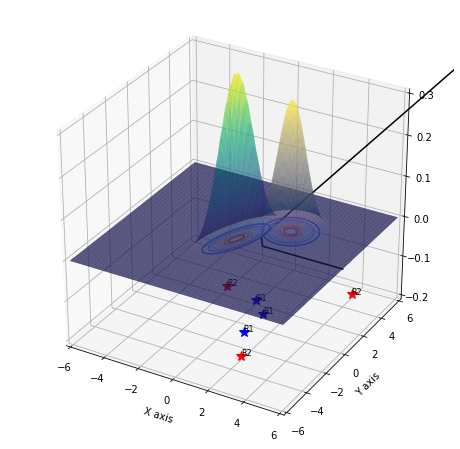

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


x1=np.array(test_data['x1'])
y1=np.array(test_data['y1'])

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([0, 0], [[.25, .3], [.3, 1]])
rx = multivariate_normal([2, 2], [[.5, 0], [0, .5]])
#Make a 3D plot

fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(111, projection="3d")





ax.plot_surface(X, Y, rv.pdf(pos), cmap="viridis", lw=0.5, rstride=1, cstride=1, alpha=0.5)

ax.plot_surface(X, Y, rx.pdf(pos), cmap="cividis", lw=0.5, rstride=1, cstride=1, alpha=0.5)

cset1 = ax.contour(X, Y, rv.pdf(pos), zdir='z', offset=0, cmap=cm.coolwarm)

cset2 = ax.contour(X, Y, rx.pdf(pos), zdir='z', offset=0, cmap=cm.coolwarm)

b=test_data.shape #Finding The Shape of Train Dataset
print(b[0]) #Printing the  Row Numbers
RowNumber=b[0] #Assigning Row Numbers in RowNumber

class_1_x=[]
class_1_y=[]
class_2_x=[]
class_2_y=[]
for i in range(0,RowNumber):
  if (test_data.at[i,'class']==1):

    class_1_x.append(test_data.at[i,'x1'])
    class_1_y.append(test_data.at[i,'y1'])

  else:
    class_2_x.append(test_data.at[i,'x1'])
    class_2_y.append(test_data.at[i,'y1'])


class_1_x=np.array(class_1_x)
class_1_y=np.array(class_1_y)
class_2_x=np.array(class_2_x)
class_2_y=np.array(class_2_y)

ax.plot3D(class_1_x,class_1_y,-0.2,'b*', markersize=10,label='Train Class 1')
ax.plot3D(class_2_x,class_2_y,-0.2, 'r*', markersize=10,label='Train Class 2')


ax.text(class_1_x[0], class_1_y[0],-0.2, "R1", size=8,
 color='k') 
ax.text(class_1_x[1], class_1_y[1],-0.2, "R1", size=8, 
 color='k') 
ax.text(class_1_x[2], class_1_y[2],-0.2, "R1", size=8, 
 color='k') 
ax.text(class_2_x[0], class_2_y[0],-0.2, "R2", size=8, 
 color='k') 
ax.text(class_2_x[1], class_2_y[1],-0.2, "R2", size=8,
 color='k') 
ax.text(class_2_x[2], class_2_y[2],-0.2, "R2", size=8, 
 color='k') 

ax.plot(Xd,Yd,0,color='black')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-0.2, 0.3)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
#ax.set_zlabel('Probability Density')
plt.show()


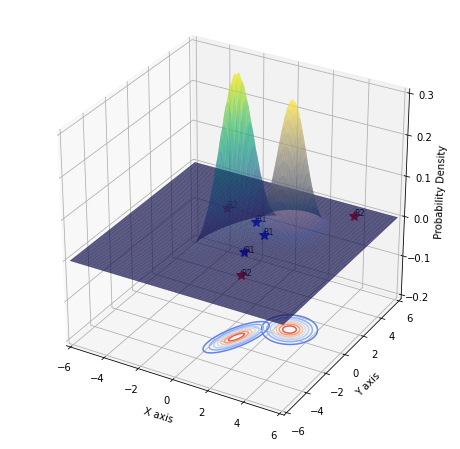

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


x1=np.array(test_data['x1'])
y1=np.array(test_data['y1'])

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([0, 0], [[.25, .3], [.3, 1]])
rx = multivariate_normal([2, 2], [[.5, 0], [0, .5]])
#Make a 3D plot

fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, rv.pdf(pos), cmap="viridis", lw=0.5, rstride=1, cstride=1, alpha=0.5)

ax.plot_surface(X, Y, rx.pdf(pos), cmap="cividis", lw=0.5, rstride=1, cstride=1, alpha=0.5)

cset1 = ax.contour(X, Y, rv.pdf(pos), zdir='z', offset=-0.25, cmap=cm.coolwarm)

cset2 = ax.contour(X, Y, rx.pdf(pos), zdir='z', offset=-0.25, cmap=cm.coolwarm)

ax.plot(class_1_x,class_1_y ,'b*', markersize=10,label='Train Class 1')
ax.plot(class_2_x,class_2_y, 'r*', markersize=10,label='Train Class 2')


ax.text(class_1_x[0], class_1_y[0],0, "R1", size=8,
 color='k') 
ax.text(class_1_x[1], class_1_y[1],0, "R1", size=8, 
 color='k') 
ax.text(class_1_x[2], class_1_y[2],0, "R1", size=8, 
 color='k') 
ax.text(class_2_x[0], class_2_y[0],0,"R2", size=8, 
 color='k') 
ax.text(class_2_x[1], class_2_y[1],0, "R2", size=8,
 color='k') 
ax.text(class_2_x[2], class_2_y[2],0, "R2", size=8, 
 color='k') 


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-0.2, 0.3)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
plt.show()

In [ ]:
Xd

array([-1. , -1.5, -2. , -2.5, -3. , -3.5, -4. , -4.5, -5. , -5.5, -6. ,
        0. ,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ])

In [ ]:
Yd

array([5.93430690e+13, 1.63605011e+17, 4.37171154e+20, 1.13223009e+24,
       2.84214468e+27, 6.91490107e+30, 1.63062485e+34, 3.72692318e+37,
       8.25610337e+40, 1.77267084e+44, 3.68900612e+47, 7.10888842e+06,
       7.51530450e-01, 2.33163986e-04, 7.01139858e-08, 2.04350705e-11,
       5.77265922e-15, 1.58053457e-18, 4.19430853e-22, 1.07881021e-25,
       2.68941620e-29, 6.49829294e-33, 1.52183949e-36])